[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM-examples.git/main?urlpath=PySDM_examples/Lowe_et_al_2019/fig_2.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM-examples/blob/main/PySDM_examples/Lowe_et_al_2019/fig_2.ipynb)

#### based on Fig. 1 from Lowe et al. 2019 (Nature Comm.)  "_Key drivers of cloud response to surface-active organics_"
https://doi.org/10.1038/s41467-019-12982-0

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install PySDM-examples notebook==`python -c "import notebook; print(notebook.__version__)"` tornado==`python -c "import tornado; print(tornado.version)"`
    !ldconfig

In [2]:
from matplotlib import pylab
import numpy as np
from PySDM.physics import si, Formulae
from PySDM_examples.utils.show_plot import show_plot
from PySDM_examples.Lowe_et_al_2019.aerosol import AerosolMarine, AerosolBoreal, AerosolNascent

/home/slayoo/devel/PySDM/PySDM/backends/__init__.py:29: UserWarning: CUDA library found but cuInit() failed (error code: 999; message: unknown error)
  warnings.warn(


In [3]:
spectra = {
    'Marine (MA)': AerosolMarine(),
    'Boreal (HYY)': AerosolBoreal(),
    'NUM event (NE)': AerosolNascent()
}

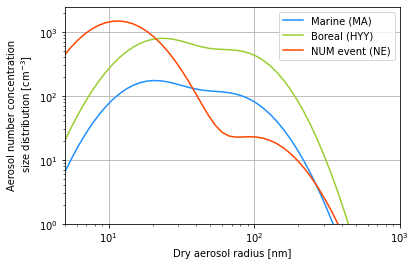

HTML(value="<a href='./tmp6fca7vsm.pdf' target='_blank'>./tmp6fca7vsm.pdf</a><br>")

In [4]:
x = np.logspace(np.log(5 * si.nm), np.log(1000 * si.nm), base=np.e)
for k, v in spectra.items():
    pylab.loglog(x / si.nm, v.dry_radius.size_distribution(x)*x / si.cm**-3, label=k, color=v.color)
pylab.ylim(1, 2500)
pylab.xlim(5, 1000)
pylab.legend()
pylab.grid()
pylab.xlabel('Dry aerosol radius [nm]')
pylab.ylabel('Aerosol number concentration\n size distribution [cm$^{-3}$]')
show_plot()

In [5]:
formulae_bulk = Formulae(surface_tension='Constant')
formulae_surf = Formulae(surface_tension='CompressedFilm')

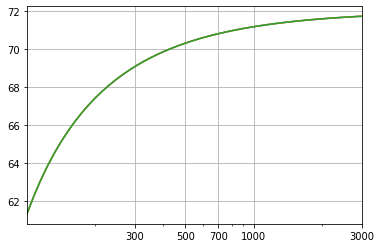

HTML(value="<a href='./tmpeo70w2db.pdf' target='_blank'>./tmpeo70w2db.pdf</a><br>")

In [8]:
r_wet = np.logspace(np.log(100 * si.nm), np.log(3000 * si.nm), base=np.e)
r_dry = 50 * si.nm
sigma = formulae_surf.surface_tension.sigma(np.nan, r_wet, r_dry)

for k, v in spectra.items():
    pylab.plot(r_wet / si.nm, sigma / (si.mN / si.m))
pylab.grid()
pylab.xscale('log')
ticks = (300, 500, 700, 1000, 3000)
pylab.xticks(ticks, ticks)
pylab.xlim(r_wet[0] / si.nm, r_wet[-1] / si.nm)
show_plot()